# Blog Post Draft

### Shuo and Jacob

#### Summary: are wheat prices being driven by a hot, dry summer?

Outline
1. Motivate with graphs of futures and spot prices
2. Show weather data (temperature and precipitation for weather stations in wheat-growing areas)
3. Compare weather data with wheat prices, see if they match

To do:
Compile weather data, compare weather this year to weather from past years

In [1]:
# Basics
import os
import pandas as pd
import numpy as np
import random as rnd
from datetime import datetime

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits import mplot3d
%matplotlib inline

# Checking
import IPython

### 1. Futures price

In [2]:
cwd = os.getcwd()

# Read in prices data

filename = 'Futures_price_Wheat_2020_Dec.csv'
location = os.path.join(cwd, filename)
futures_df = pd.read_csv(location, header=0)

In [4]:
futures_df.dropna()
futures_df['Date'] = [datetime.strptime(x, '%Y-%m-%d').date() \
                    for x in futures_df['Date']]
futures_df = futures_df[futures_df['Date']>datetime(2020,1,1).date()]

Text(0.5, 1.0, 'Hard Red Wheat Futures Prices (2020 December Contract)')

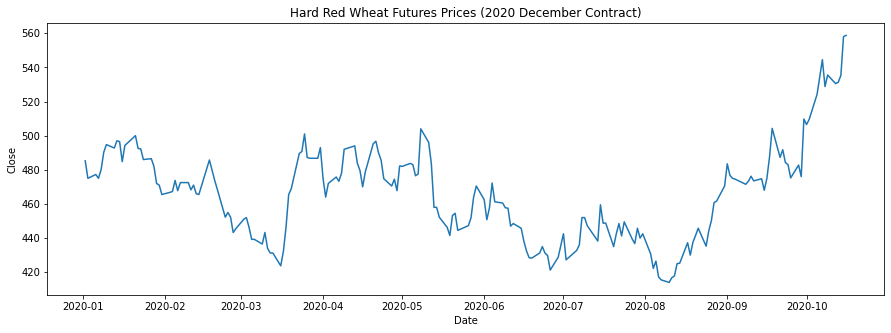

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=futures_df, \
             x="Date", \
             y="Close").set_title("Hard Red Winter Wheat Futures Prices (2020 December Contract)")

### 2. Precipitation

In [32]:
# Read in stock data

filename = 'Precipitation_winter_wheat_belt.xlsx'
location = os.path.join(cwd, filename)
pcp_df = pd.read_excel(location, header=0)

[Text(0, 0.5, 'Precipitation'), Text(0.5, 0, 'Month')]

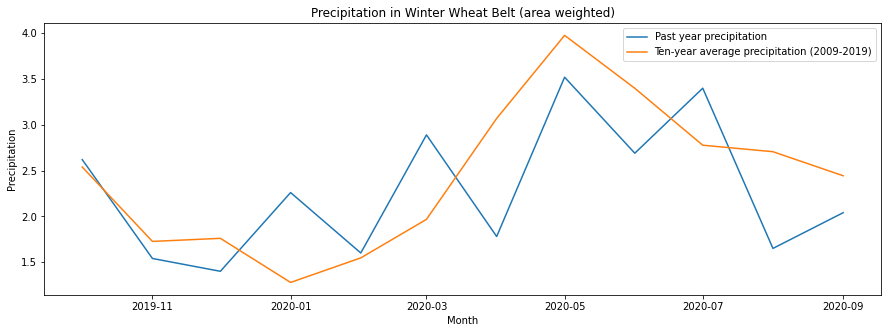

In [33]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=pcp_df, \
             x="Month", \
             y="Last year", label="Past year precipitation").set_title("Precipitation in Winter Wheat Belt (area weighted)")
sns.lineplot(data=pcp_df, \
             x="Month", \
             y="Ten-year average", label="Ten-year average precipitation (2009-2019)")
plt.legend()
ax.set(xlabel='Month', ylabel='Precipitation')

In [34]:
# Read in stock data

filename = 'Precipitation_spring_wheat_belt.xlsx'
location = os.path.join(cwd, filename)
pcp_df = pd.read_excel(location, header=0)

[Text(0, 0.5, 'Precipitation'), Text(0.5, 0, 'Month')]

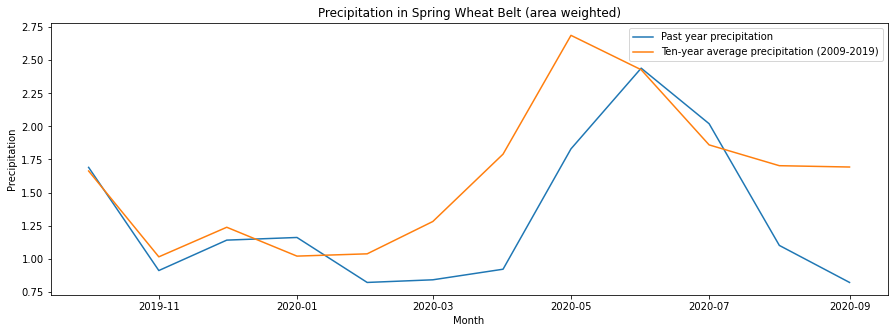

In [35]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=pcp_df, \
             x="Month", \
             y="Last year", label="Past year precipitation").set_title("Precipitation in Spring Wheat Belt (area weighted)")
sns.lineplot(data=pcp_df, \
             x="Month", \
             y="Ten-year average", label="Ten-year average precipitation (2009-2019)")
plt.legend()
ax.set(xlabel='Month', ylabel='Precipitation')

### 3. Storage

In [68]:
# Read in stock data

filename = 'Wheat_stock.xlsx'
location = os.path.join(cwd, filename)
stock_df = pd.read_excel(location, header=1)

In [72]:
stock_df['Year'] = [x.year for x in stock_df['Report_date']]
stock_df['Report Date Each Year'] = [x.month for x in stock_df['Report_date']]
numtostr = {"Report Date Each Year": {3: 'March 1st', 6: 'June 1st', 9: 'September 1st', 12: 'December 1st'}}
stock_df.replace(numtostr, inplace=True)

Text(0.5, 1.0, 'Stock Reported in March, June, September, and December from 2016 to 2020 (1,000 Bushels)')

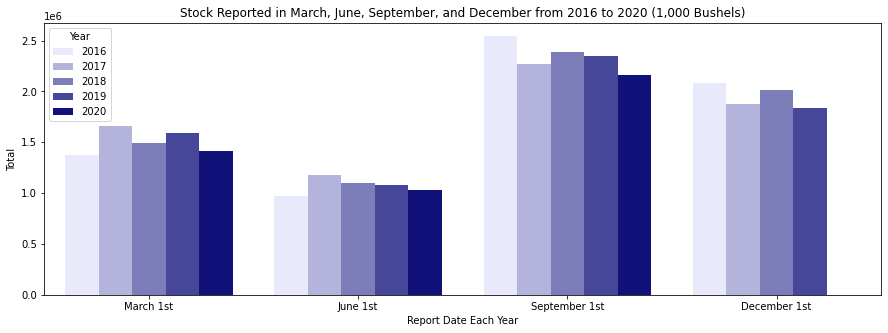

In [73]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x="Report Date Each Year", y="Total", hue="Year", data=stock_df, color='darkblue').set_title("Total Stock Reported from 2016 to 2020 (1,000 Bushels)")

In [ ]:
# Read in prices data

filename = 'Futures_price_Wheat_2020_Dec.csv'
location = os.path.join(cwd, filename)
futures_df = pd.read_csv(location, header=0)